# MATH3024 Project 
Ashkaan Gaurav Singh (23352583)

October 18th 2024

This project was produced and uses an [Anaconda](https://www.anaconda.com/) kernel running ```Python 3.12.4```



## 1. Introduction

### 1.1 Background
The COVID-19 pandemic brought unprecedented changes to societies worldwide, with lockdowns becoming a central method for controlling the spread of the virus. These enforced restrictions aimed to limit social interaction, reduce transmission rates, and protect public health. However, prolonged lockdowns also led to significant psychological impacts on individuals, often resulting in anxiety, depression, stress [1], and even defiance of the measures designed to ensure public safety.

During lockdowns, individuals were required to drastically limit their movement, often confined to their homes for extended periods. These isolation and quarantine measures had profound effects on mental well-being, contributing to increased feelings of frustration, boredom, and a sense of being trapped. The lack of social interaction and the disruption of normal routines only exacerbated these feelings, leading many to experience psychological distress. These emotional responses, in turn, fueled rebelious behavior, where individuals, out of frustration and agitation, defied lockdown rules and sought social interaction despite the risk of infection. I will aim to model this emotional response as an agitation of agents due to its relationship with anixety and depression [2]. This agitation is linked to the amount of days since an agent last had contact with their neighbours.

The quote, “Despite all my rage, I am still just a rat in a cage,” encapsulates the profound frustration and sense of confinement experienced by individuals ("rats") during quarantine and lockdown ("cage") situations. Within my model, the “rage” symbolizes the agitation that arises as a direct consequence of these restrictions, highlighting the emotional and psychological challenges faced by people in times of enforced isolation.

My model seeks to provide valuable simulations and comprehensive statistics to predict the infected proportions after a year of living with a specific disease or virus. By employing advanced modeling techniques, the goal is to create a robust framework that not only illustrates the potential trajectories of infection rates but also offers insights into how these patterns can influence public health outcomes and individual behaviors. An important aspect of this model is to provide a platform to  amke decisions regarding the enforcement of lockdowns. This is particularly relevant in the context of public sentiment, as some members of the Australian population have expressed strong opposition to quarantine measures, even taking to the streets to voice their opinions [8]. In contrast, a study conducted in Germany revealed that while the majority of the population complied with lockdown measures, many respondents were resistant to long-lasting restrictions [9]. Maintaining public happiness and trust is crucial for governments to prevent discontent and minimize rebellious activities. If citizens feel that their needs and concerns are being ignored, they may view authorities as adversaries rather than allies in public health. Therefore, my model aims to balance the need for effective disease control with the imperative of preserving societal well-being. By providing data-driven insights, it can help policymakers navigate the complex landscape of public health and social stability, ultimately fostering cooperation and adherence among the population.

Many Agent-Based Models (ABM) for disease simulations utilise the SIR model [4], including rates of infection and rates of recovery. For simplicity, all agents in my model have homogeneous rates of recovery where it takes some amount of time steps (days) to be classified as recovered [3]. Further, the rate of infection is homogeneous as it relates to a specific disease’s strength. This relates an agent’s probability of infection to be the rate of infection multiplied by the probability of coming into close contact with an already infected agent.

Other models move around and interact with others within some radius [3, 10]. I have decided to model a disease model with limited movement to be representative of the lockdown situations during Covid-19. All agents in the model are homogeneous except for their current states. Other disease-related analyses have discussed the changes in transmission based on age [5]. I have decided not to implement this to focus more on a model that is based on purely an agents decisions and more generalised. Further models have been molded to capture lockdown social distancing measures such as school closure, workplace attendance and contact reduction [6]. The model driving my project utilises the concept of contact reduction by giving agents the ability to visit the shops and host barbecues with their neighbours. School closure and workplace attendance were not added as to maintain homogeneous agents. 

All states in Australia generally close all non-essential businesses. Restraunts were allowed to stay open providing they were making takeaway orders as food is a necessity to all, as a result, shops like Woolworths and Coles were as well [7]. This context driving the model is the reason for defining the agents main source of interactions as "visiting the shops". In February 2023, a survey performed on the Australian population showed that 53% of them shopped once a week [9]. Further, 88% of people in the survery shop every day and once a week [9]. Backed by these statistics, after an agent visits the shops, the amount of days before they visit the shops again is randomly drawn from a uniform distribution between 0 and 6, where 0 implies visiting the shop the day after already visiting and 6 implies waiting a week till till the next shop.
 

### 1.2 Model 

*Aside: Words written in all caps are global parameters within the model.*

The model is an ABM in a grid space where an individual agent occupies a 1 × 1 grid location as their “home”. The centre row and centre column are greyed out where no agents exist. This is done to give a more suburban representation of the visualisation. The centre cell is defined as the shopping centre.

The shopping centre creates forced interactions between agents. As each day progresses the Agent.days without a shop decrements by 1. When this variable for an Agent hits 0, then they **must** go to the shops and risk being infected. The agent simply jumps from their home to the shopping centre. However, in a more realistic perspective this jumping action is better described as a person leaving their home, getting in the car and drving back and forth. The implementation is structured to simulate the lockdown scenario of limited movement except for necessary movement such as grocery shopping. Moreover, if an agent hosts a barbecue, then all of its Von Neumann (NESW) neighbours surrounding it **must** also join. This then implies that an agent **must** join a barbecue if any of its Von Neumann neighbours host one. Therefore, at a hosts barbecue, there'll always be at most 5 agents (if it is within the grid), 4 agents (if it is on the edge) and 3 agents (if it is on the corners)

#### 1.2.1 Initisalisation

The grid is initialised with an agent in each cell. During this, agents are initially infected with probability = ```INITIAL_PROBABILITY_INFECTED``` (i.e. the initial proportion of infected agents is $ \approx $ ```INITIAL_PROBABILITY_INFECTED```) and Agent.days_to_recover is a randomly assigned value between 1 and ```DAYS_TO_RECOVER``` if infected. If the agent is not infected, Agent.days_to_recover is set to 0. Agent.days_without_a_shop is set to a randomly chosen value between 0 and ```DAYS WITHOUT A SHOP``` and Agent.agitation is set to a randomly chosen value between 0 and ```AGITATION_MAX```. 

The agents are initialised with random assigned values for their own attributes to better represent the diversity of the population in the initial setup.

#### 1.2.2 State Transitions

##### Not Infected $ \rightarrow $ Infected

When an uninfected agent visits the shops or hosts/joins a barbecue, the probability of the uninfected agent becoming infected is = proportion of infected agents $\times $ by the probability of transmission. If the agent becomes infected, the agent takes ```DAYS_TO_RECOVER``` amount of days to recover. All agents take the same amount of days to recover making them homogeneous in this aspect.

```python
probability_of_infection = proportion_infected * PROBABILITY_OF_TRANSMISSION

Agent.infected = random.uniform(0,1) <= probability_of_infection

if Agent.infected:
    agent.days_to_recover = DAYS_TO_RECOVER

```

##### Infected $ \rightarrow $ Immune

After an agents days_to_recover attribute returns to 0, they are now no longer infected and have gained immunity for ``` NATURAL_IMMUNITY ```.

```python
if agent.days_to_recover == 0:
    agent.infected = False
    agent.natural_immunity = NATURAL_IMMUNITY
```

##### Immune $ \rightarrow $ Not Infected

Once an agents natural_immunity attribute returns to 0, they are now susceptible to being infected.

#### 1.2.3 Time Step Dynamics
*Each time step is representive of a day.*

At the start of each day/iteration, all agents have their days_without_a_shop attributes reduced by 1 and their agitation attribute increases by 1. Where $ A $ is the set of agents:
$$ \forall a \in A, \quad \text{days\_without\_a\_shop}(a) = \text{days\_without\_a\_shop}(a) - 1, \quad \text{agitation(a)} = \text{agitation(a)} + 1$$
When the attribute for an agent reaches 0, they will visit the shop and risk getting infected if they are not infected. This is one of the scenarios in which the Not Infected $ \rightarrow $ Infected state transition occurs.

If an agent is infected, its days_to_recover attribute is reduced by 1 inching it closer to being recovered. Where $ A_{infected} $ is the set of infected agents:
$$ \forall a_i \in A_{infected}, \quad \text{days\_to\_recover}(a_i) = \text{days\_to\_recover}(a_i) - 1$$
When the attribute for an agent reaches 0, they will perform the Infected $ \rightarrow $ Immune state transition.

## 2. Methods

### 2.1 Required Libraries and Versions

```python
numpy       1.26.4
random      3.12.4
matplotlib  3.9.2
ordpy       1.1.5
IPython     8.28.0
```

To check what the version of a package you is being used run ``` !pip show <package> ```. To upgrade a package to its most recent version run ``` !pip install --upgrade <package> ```. To install a package run ``` !pip install <package> ```. All these should be run in a code cell within the Jupyter Notebook.

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation as animation
import ordpy
from IPython.display import HTML

### 2.2 Global Variables

In [49]:
# GLOBAL VARIABLES
INITIAL_PROBABILITY_INFECTED = 0.35
ROWS = COLS = 25
PROBABILITY_OF_INFECTION = 0.4
DAYS_TO_RECOVER = 7
DAYS_WITHOUT_A_SHOP = 3
CENTER_ROW = CENTER_COL = ROWS // 2
NATURAL_IMMUNITY = 5
AGITATION_MAX = 10

# POWER LAW DISTRIBTUTION
x = np.arange(0, AGITATION_MAX)

alpha = 4  
P_LAW_DIST = np.power(x, alpha) / np.sum(np.power(x, alpha))


### 2.3 Agent Class

In [57]:
class individual():
    def __init__(self):
        self.need_to_visit = random.randint(0, DAYS_WITHOUT_A_SHOP)
        self.infected = random.uniform(0, 1) < INITIAL_PROBABILITY_INFECTED
        self.natural_immunity = 0
        if self.infected:
            self.days_to_recover = random.randint(1, DAYS_TO_RECOVER)
        else:
            self.days_to_recover = 0
        self.agitation = random.randint(0, AGITATION_MAX)

## Set Up

In [127]:
def day_change(grid):
    need_to_visit_list = []
    count_infected_visitors = 0
    for i in range(ROWS):
        for j in range(COLS):
            if i != CENTER_ROW and j != CENTER_COL:
                person = grid[i,j]
                person.need_to_visit -= 1
                
                if person.infected:
                    if person.days_to_recover == 0:
                        person.infected = False
                        person.natural_immunity = NATURAL_IMMUNITY
                    else:
                        person.days_to_recover -= 1
                        
                elif person.natural_immunity > 0:
                    person.natural_immunity -= 1

                if person.need_to_visit <= 0:
                    if person.infected:
                        count_infected_visitors += 1
                    else:
                        need_to_visit_list.append(person)
                        person.need_to_visit = random.randint(1, DAYS_WITHOUT_A_SHOP)

                if person.agitation < AGITATION_MAX:
                    person.agitation += 1
    
    visit_shops(need_to_visit_list, count_infected_visitors)

    for _ in range(5):
        random_agent_i = random.randint(0, CENTER_COL - 1)
        random_agent_j = random.randint(0, ROWS - 1)

        while grid[random_agent_i][random_agent_j] == None:
            random_agent_i = random.randint(0, COLS - 1)
            random_agent_j = random.randint(0, ROWS - 1)

        chosen_agent = grid[random_agent_i][random_agent_j]
        
        prob_chosen_agent_to_host = sum(P_LAW_DIST[:chosen_agent.agitation])

        choices = [True, False]
        probabilities = [prob_chosen_agent_to_host, 1 - prob_chosen_agent_to_host]

        choice = random.choices(choices, probabilities)[0]
        
        if choice:
            have_bbq(grid, random_agent_i, random_agent_j)
    
        

    
                    
    
                    
                        

In [147]:
def initialise(grid, show = False):        
    for i in range(ROWS):
        for j in range(COLS):
            if i == CENTER_ROW or j == CENTER_COL:
                grid[i][j] = None
            else:
                grid[i][j] = individual()

    infection_mask = np.zeros((ROWS, COLS), dtype=int)
    for i in range(ROWS):
        for j in range(COLS):
            if i != CENTER_ROW and j != CENTER_COL:
                infection_mask[i, j] = int(grid[i, j].infected)

    # Set the center cell, rows and columns as empty
    infection_mask[:, CENTER_COL] = -1
    infection_mask[CENTER_ROW, :] = -1
    infection_mask[CENTER_ROW, CENTER_COL] = -1

    if show:
        visualise_grid(infection_mask)
    
    

In [6]:
def statistics(proportions):
    plt.plot(proportions, linestyle='-', color='b')
    plt.xlabel('Day')
    plt.ylabel('Infected Proportion')
    plt.ylim(0, 1)
    plt.title('Time Series Proportions')
    plt.grid(True)
    plt.show()
    

In [10]:
def day(frame, grid, show = False):
    # print(frame + 1)
    infection_mask = np.zeros((ROWS, COLS), dtype=int)
    safe_count = 0
    infected_count = 0
    for i in range(ROWS):
        for j in range(COLS):
            if i != CENTER_ROW and j != CENTER_COL:
                if grid[i, j].infected:
                    infected_count += 1
                else:
                    safe_count += 1
                infection_mask[i, j] = int(grid[i, j].infected)

    # results.append(infected_count/(safe_count + infected_count))

    day_change(grid)
                
    
    # Set the center cell as empty
    infection_mask[:, CENTER_COL] = -1
    infection_mask[CENTER_ROW, :] = -1
    infection_mask[CENTER_ROW, CENTER_COL] = -1
    
    # Define a custom color map
    cmap = mcolors.ListedColormap(['gray', 'blue', 'red'])
    bounds = [-1.5, -0.5, 0.5, 1.5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    
    if show:
        ax.clear()
        ax.imshow(infection_mask, cmap=cmap, norm=norm, interpolation='nearest')
        ax.set_title(f"Day: {frame + 1}, Immunity: {NATURAL_IMMUNITY}, Days Without a Shop: {DAYS_WITHOUT_A_SHOP}, Prob. Infection: {PROBABILITY_OF_INFECTION}")

    return infected_count/(safe_count + infected_count)

    

In [58]:
def visit_shops(visitors, infected_visitors_count):
    if infected_visitors_count > 0:
        prob_infection = infected_visitors_count/(len(visitors) + infected_visitors_count)
    else:
        prob_infection = 0

    prob_infection *= PROBABILITY_OF_INFECTION

    if infected_visitors_count > 0:
        for visitor in visitors:
            if visitor.natural_immunity <= 0:
                visitor.infected = random.uniform(0, 1) <= prob_infection

                if visitor.infected:
                    visitor.days_to_recover = DAYS_TO_RECOVER
    

In [59]:
moore_neigh = {'N': (1, 0), 'E': (0, 1), 'S': (-1, 0), 'W': (0, -1)}

def get_neighbours(grid, i, j):
    neighbours = []
    for i_shift, j_shift in moore_neigh.values():
        i_new = i + i_shift
        j_new = j + j_shift

        if 0 <= i_new < ROWS and 0 <= j_new < COLS and i_new != CENTER_ROW and j_new != CENTER_COL:
            neighbours.append(grid[i_new][j_new])

    return neighbours

def have_bbq(grid, i, j):
    host = grid[i][j]
    neighbours = get_neighbours(grid, i, j)

    uninfected_agents = []

    if not host.infected and host.natural_immunity <= 0:
        uninfected_agents.append(host) 
    
    for neighbour in neighbours:
        if not neighbour.infected and neighbour.natural_immunity <= 0:
            uninfected_agents.append(neighbour)

    infected_count = len(neighbours) + 1 - len(uninfected_agents)

    prob_infection = infected_count/(len(neighbours) + 1)
        
    prob_infection *= PROBABILITY_OF_INFECTION

    if infected_count > 0:
        for person in uninfected_agents:
            person.infected = random.uniform(0, 1) < prob_infection

            if person.infected:
                person.days_to_recover = DAYS_TO_RECOVER
                # print(infected_count, host.infected)
                # print("someone became infected after visiting the bbq", prob_infection, (i,j), len(uninfected_agents))

    host.agitation = 0
    for neighbour in neighbours:
        neighbour.agitation = 0


In [157]:
def ensemble_run():
    all_results = []
    
    for i in range(10):
        grid = np.empty((ROWS, COLS), dtype = object)
        initialise(grid)
        
        results = []
        # print(type(results))
        for i in range(365):
            # print(i)
            prop = day(i, grid)
            results.append(prop)
        
        all_results.append(results)

    return np.mean(all_results, axis = 0), np.std(all_results, axis = 0)
    

In [153]:
def statistics_ensemble(all_results_dict, infection_key, immunity, initial_prob_infect, prob_infection):
    # Loop through each ensemble run (key) and its associated average proportion values

    results = []

    for run_count, vals in all_results_dict[immunity][initial_prob_infect][prob_infection].items():   
        means, std_devs = vals

        results.append(means)
        
        # Generate an array of x values corresponding to the indices of the lists
        x = np.arange(1, len(means) + 1)
        
        # Plot the mean values
        # plt.plot(x, means, label=f'Run {run_count + 1}', linestyle='-')
        
        # Plot the standard deviation as a shaded area
        # plt.fill_between(x, means - std_devs, means + std_devs, alpha=0.2)

    ensemble_mean = np.mean(results, axis = 0)
    ensemble_std = np.std(results, axis = 0)

    predicted_convergence = np.mean(ensemble_mean[-101:-1])
    print(predicted_convergence)

    plt.hlines(predicted_convergence, xmin = 355, xmax = 385, linestyle = '--', color = 'aquamarine', label = 'Predicted Convergence')
    
    # plt.plot(x, ensemble_mean, label=f'MEAN', linestyle='--', color = 'black')
    plt.fill_between(x, ensemble_mean - ensemble_std, ensemble_mean + ensemble_std, alpha=0.2)

    # x_err = x[::7]
    # y_err = ensemble_mean[::7]
    # yerr_err = ensemble_std[::7]

    # Plot error bars at every 7th point
    # plt.errorbar(x_err, y_err, yerr=yerr_err, fmt = 'rX', label='Error bars')

    # perm_entr_values = ordpy.permutation_entropy(ensemble_runs[4][0.9][1.0][4][0][0], dx = 7, base = 2, normalized = True)
    
    # Add labels and a legend
    plt.xlabel('Day')
    plt.ylabel('Proportion')
    plt.title(f'Immunity {immunity} | Initial Prob Infection {initial_prob_infect * 100}% | Probability of Infection {prob_infection * 100}%')
    # plt.ylim(min(ensemble_mean) - 0.2, max(ensemble_mean) + 0.2) 
    plt.ylim(0, 1)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Ensemble Runs')
    
    # Show the plot
    plt.show()

In [146]:
def visualise_grid(infection_mask):
    # Define a custom color map
    cmap = mcolors.ListedColormap(['gray', 'blue', 'red'])
    bounds = [-1.5, -0.5, 0.5, 1.5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Visualize the grid
    img = plt.imshow(infection_mask, cmap=cmap, norm=norm, interpolation='nearest')
    
    # Add a colorbar and set custom tick labels
    cbar = plt.colorbar(img)
    cbar.set_ticks([-1, 0, 1])
    cbar.set_ticklabels(['empty', 'not infected', 'infected'])
    
    plt.title('Grid Visualisation')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

# ACTUAL CODE

In [150]:
grid = np.empty((ROWS, COLS), dtype = object)
initialise(grid)

In [158]:
random.seed(3024)
ROWS = COLS = 25
CENTER_ROW = CENTER_COL = ROWS // 2
DAYS_WITHOUT_A_SHOP = 6

ensemble_runs = {}
infection_key = {}

prob_infections = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
immunities = [0, 7, 14, 21, 28, 35]

for immunity in immunities[5:6]:
    ensemble_runs[immunity] = {}
    NATURAL_IMMUNITY = immunity
    for initial_prob_infect in prob_infections[3:4]:
        ensemble_runs[immunity][initial_prob_infect] = {}
        INITIAL_PROBABILITY_INFECTED = initial_prob_infect

        for prob_infect in prob_infections[7:8]:
            infection_count = 0
            infection_key[prob_infect] = infection_count
            ensemble_runs[immunity][initial_prob_infect][prob_infect] = {}
            PROBABILITY_OF_INFECTION = prob_infect
            for run in range(5):
                ensemble_avg, ensemble_std = ensemble_run()

                ensemble_runs[immunity][initial_prob_infect][prob_infect][run] = (ensemble_avg, ensemble_std)

            infection_count += 1

    
    

In [109]:
ensemble_runs

{14: {0.4: {0.6: {0: (array([0.39305556, 0.43541667, 0.40590278, 0.38090278, 0.36267361,
            0.34722222, 0.32326389, 0.30677083, 0.26666667, 0.24340278,
            0.23697917, 0.22534722, 0.21371528, 0.19114583, 0.16875   ,
            0.14392361, 0.13194444, 0.12690972, 0.12135417, 0.1171875 ,
            0.11267361, 0.11510417, 0.12118056, 0.13159722, 0.14166667,
            0.15173611, 0.16267361, 0.17118056, 0.18732639, 0.20190972,
            0.21319444, 0.2203125 , 0.23229167, 0.24253472, 0.25138889,
            0.25920139, 0.25972222, 0.25798611, 0.26128472, 0.265625  ,
            0.26041667, 0.25364583, 0.24045139, 0.23194444, 0.22777778,
            0.21822917, 0.20989583, 0.20017361, 0.19340278, 0.18836806,
            0.18993056, 0.18611111, 0.18263889, 0.18107639, 0.17638889,
            0.17395833, 0.17239583, 0.17378472, 0.1734375 , 0.17638889,
            0.18003472, 0.18177083, 0.18628472, 0.19479167, 0.19965278,
            0.20190972, 0.20434028, 0.21163194,

In [48]:
random.seed(3024)
for _ in range(15):
    test()

2
10
1
4
7
3
8
7
10
7
3
0
8
9
6


0.1442902777777778


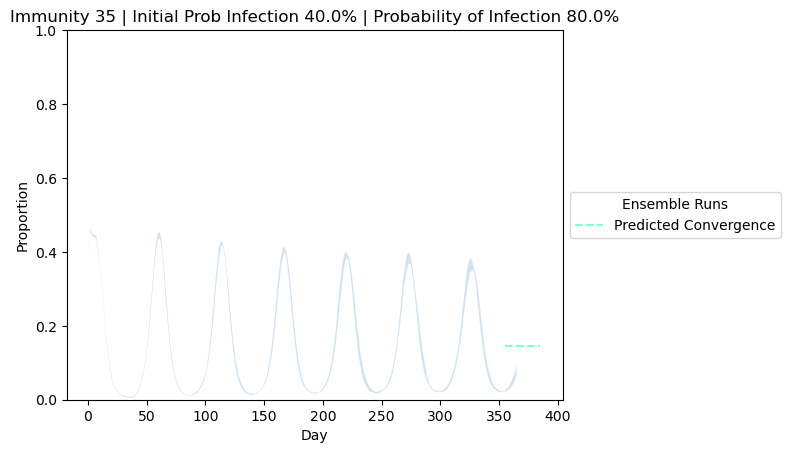

In [154]:
statistics_ensemble(ensemble_runs, infection_key, 35, 0.4, 0.8)

0.0


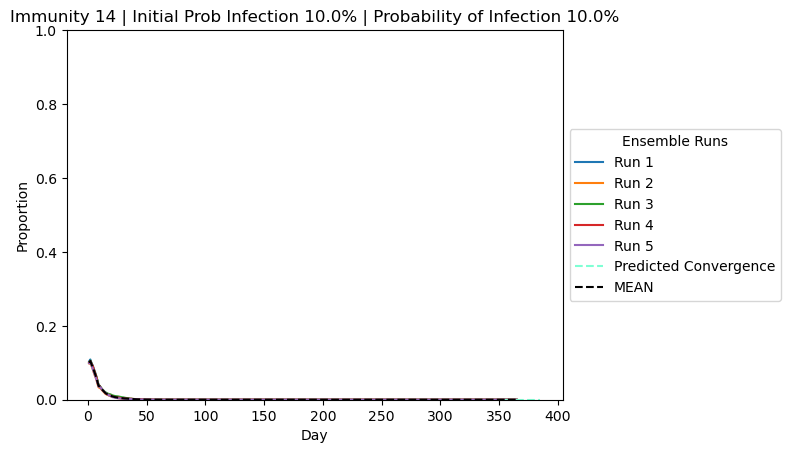

In [32]:
statistics_ensemble(ensemble_runs, infection_key, 14, 0.1, 0.1)

In [324]:
# ensemble_runs[4][0.9][1.0]

sums = np.zeros_like(ensemble_runs[1][1.0][1.0][0][0])
# ensemble_runs[4][0.9][1.0][0][0][0]
# print(sums[-51:-1])

for key, val in ensemble_runs[1][1][1].items():
    sums += val[0][0]

print(np.average((sums/len(ensemble_runs[4][1][0.1]))[0][-51:-1]))


0.741435634451019


In [104]:
NATURAL_IMMUNITY = 35
INITIAL_PROBABILITY_INFECTED = 0.4
PROBABILITY_OF_INFECTION = 0.4
ROWS = COLS = 25
CENTER_ROW = CENTER_COL = ROWS // 2
DAYS_WITHOUT_A_SHOP = 7

# random.seed(3024)
grid = np.empty((ROWS, COLS), dtype = object)
initialise(grid)

results = []

fig, ax = plt.subplots()
plt.close()

anim = animation.FuncAnimation(fig, day, fargs = (grid,True), frames=365, interval=100)

# Display the animation as a video
HTML(anim.to_html5_video())

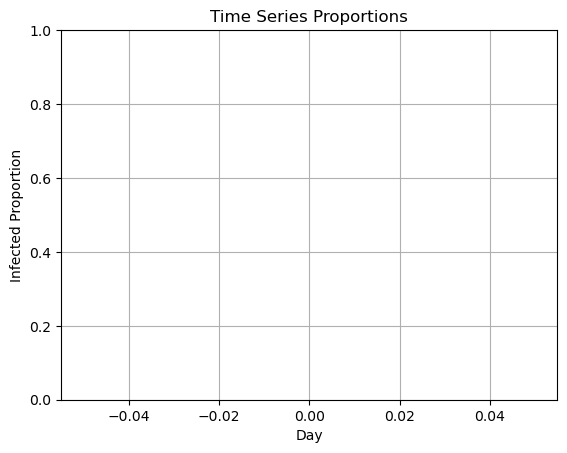

In [413]:
statistics(results)

In [415]:
rounded_numbers = [round(num, 4) for num in results]
rounded_numbers

[]

In [459]:
perm_entr_values = ordpy.permutation_entropy(ensemble_runs[35][0.4][0.4][0][0], dx = 7, base = 2, normalized = True)

In [461]:
ensemble_runs[35][0.4][0.4][0][0]

array([0.39548611, 0.44513889, 0.43489583, 0.43836806, 0.4234375 ,
       0.40729167, 0.38802083, 0.36180556, 0.33385417, 0.30607639,
       0.2765625 , 0.23472222, 0.20069444, 0.17065972, 0.14548611,
       0.12204861, 0.09913194, 0.08315972, 0.06770833, 0.05642361,
       0.04774306, 0.03940972, 0.03194444, 0.02708333, 0.02447917,
       0.01961806, 0.01649306, 0.01354167, 0.01180556, 0.01041667,
       0.00850694, 0.00642361, 0.00503472, 0.00451389, 0.0046875 ,
       0.00364583, 0.00347222, 0.003125  , 0.00399306, 0.00399306,
       0.00538194, 0.00659722, 0.00677083, 0.00711806, 0.009375  ,
       0.01163194, 0.01302083, 0.01666667, 0.01996528, 0.0234375 ,
       0.02881944, 0.0359375 , 0.04079861, 0.046875  , 0.05642361,
       0.06666667, 0.08125   , 0.09427083, 0.10972222, 0.12361111,
       0.14305556, 0.16545139, 0.18715278, 0.20416667, 0.22048611,
       0.23246528, 0.24496528, 0.25746528, 0.26475694, 0.26892361,
       0.26736111, 0.26302083, 0.24930556, 0.24253472, 0.23385

In [462]:
perm_entr_values

0.22909125182000303

In [108]:
perm_entr_values

0.5892248265350079

In [33]:
# rounded_numbers
print(grid[:][CENTER_ROW])

[None None None None None None None None None None None None None None
 None None None None None None]


In [154]:
sum(probabilities[:3])
probabilities[:3]

array([0.00000000e+00, 5.67208540e-07, 9.07533664e-06])

In [78]:
sum(probabilities)

1.0

In [382]:
# import pandas as pd

# Example data for the combinations
data = {
    'Immunity Level': [0.1, 0.2, 0.3, 0.4, 0.1],
    'Initial Infection Probability': [0.05, 0.10, 0.15, 0.20, 0.1],
    'Infection Probability': [0.01, 0.05, 0.10, 0.20, 0.01],
    'Mean Infected': [10, 20, 30, 40, 10]  # Example statistics  # Example statistics
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   Immunity Level  Initial Infection Probability  Infection Probability  \
0             0.1                           0.05                   0.01   
1             0.2                           0.10                   0.05   
2             0.3                           0.15                   0.10   
3             0.4                           0.20                   0.20   
4             0.1                           0.10                   0.01   

   Mean Infected  
0             10  
1             20  
2             30  
3             40  
4             10  


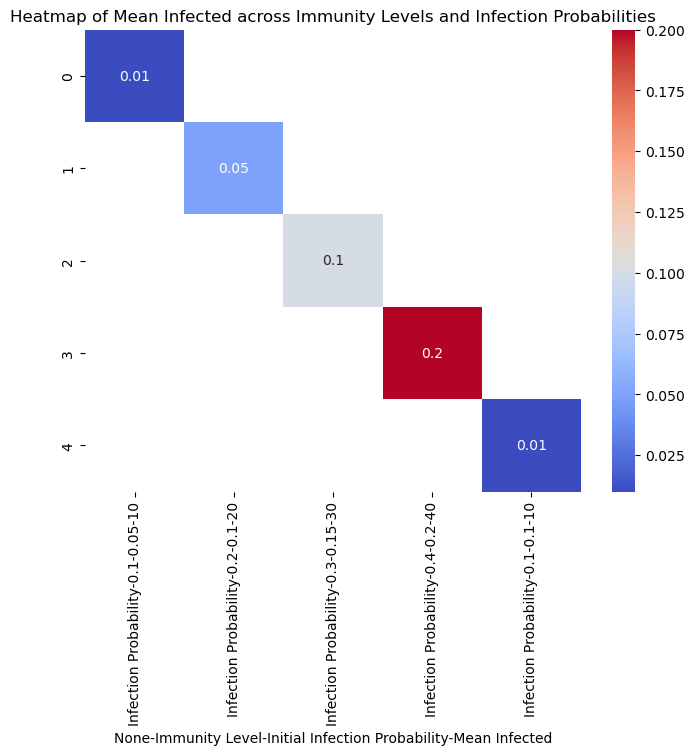

In [383]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table for heatmap (can use other combinations too)
heatmap_data = df.pivot(columns=['Immunity Level', 'Initial Infection Probability', 'Mean Infected'])

# Create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Mean Infected across Immunity Levels and Infection Probabilities')
plt.show()


In [381]:
ensemble_runs

{0: {0.3: {0.7: {0: (array([0.2991453 , 0.36988823, 0.41466141, 0.49414859, 0.5634451 ,
            0.62978304, 0.69980276, 0.76140697, 0.81577909, 0.84010519,
            0.84812623, 0.83708087, 0.8268902 , 0.82031558, 0.81512163,
            0.81775148, 0.82084155, 0.82965155, 0.83392505, 0.82426036,
            0.82209073, 0.82531229, 0.81946088, 0.81827745, 0.81965812,
            0.82057857, 0.82452334, 0.82478632, 0.82853386, 0.82511506,
            0.82399737, 0.81965812, 0.81867193, 0.81939513, 0.82038133,
            0.82669297, 0.82649573, 0.82537804, 0.82498356, 0.8251808 ,
            0.82393162, 0.82426036, 0.82228797, 0.81913215, 0.82143327,
            0.82340565, 0.82294543, 0.82327416, 0.82472058, 0.82386588,
            0.82222222, 0.82241946, 0.81946088, 0.8191979 , 0.82314267,
            0.82202498, 0.82274819, 0.82044707, 0.82301118, 0.82149901,
            0.82241946, 0.8226167 , 0.81768573, 0.8209073 , 0.82209073,
            0.82110454, 0.82136752, 0.82235371, 

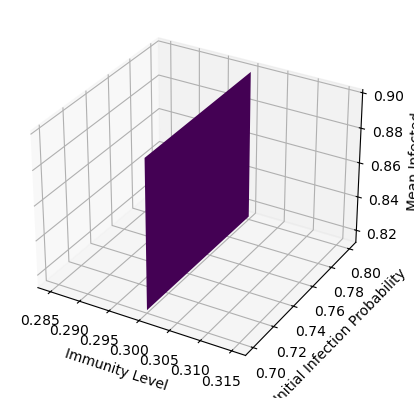

In [390]:
immunity = np.array([0.3, 0.3])
initial_infection_prob = np.array([0.7, 0.8])

X, Y = np.meshgrid(immunity, initial_infection_prob)
# Z = np.array([[10, 15, 20, 25], [12, 17, 22, 28], [14, 19, 24, 30]])
# print(np.average(ensemble_runs[0][0.3][0.7][0][-51:-1]))
Z = np.array([[0.814526492123963, 0.9]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create surface plot
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Immunity Level')
ax.set_ylabel('Initial Infection Probability')
ax.set_zlabel('Mean Infected')

plt.show()


## Bibliography
[1] Rajkumar, E., Rajan, A. M., Daniel, M., Lakshmi, R., John, R., George, A. J., Abraham, J., & Varghese, J. (2022). The psychological impact of quarantine due to COVID-19: A systematic review of risk, protective factors and interventions using socio-ecological model framework. Heliyon, 8(6), e09765. https://doi.org/10.1016/j.heliyon.2022.e09765

[2] Liu, K. Y., Costello, H., Reeves, S., & Howard, R. (2020). The Relationship Between Anxiety and Incident Agitation in Alzheimer’s Disease. Journal of Alzheimer’s Disease, 78(3), 1119–1127. https://doi.org/10.3233/jad-200516

‌[3] Nguyen, L. (2023, August 4). “Simulation 102: Agent-Based Disease Modeling”. Medium. https://medium.com/@ln8378/simulation-102-agent-based-disease-modeling-17307f2de2f3

[4] Hunter, E., Namee, B., & Kelleher, J. (2018). “A Comparison of Agent-Based Models and Equation Based”. ARROW@TU Dublin. https://doi.org/10.21427/rtq2-hs52

[5] Anderson, R. M., & May, R. M. (1985). “Age-related changes in the rate of disease transmission: implications for the design of vaccination programmes”. Epidemiology & Infection, 94(3), 365–436. https://doi.org/10.1017/S002217240006160X

[6] Milne, G. J., Xie, S., Poklepovich, D., O’Halloran, D., Yap, M., & Whyatt, D. (2021). A modelling analysis of the effectiveness of second wave COVID-19 response strategies in Australia. Scientific Reports, 11(1). https://doi.org/10.1038/s41598-021-91418-6
‌

[7] Stobart, A., & Duckett, S. (2021). Australia’s Response to COVID-19. Health Economics, Policy and Law, 17(1), 1–29. https://doi.org/10.1017/s1744133121000244

[8] Press, A. A. (2021, August 22). Police say Melbourne anti-lockdown protest “most violent in nearly 20 years.” The Guardian. https://www.theguardian.com/australia-news/2021/aug/22/police-say-melbourne-anti-lockdown-protest-most-violent-in-nearly-20-years

‌[9] Australia: grocery shopping frequency 2023. (n.d.). Statista. https://www.statista.com/statistics/1379099/australia-grocery-shopping-frequency/

[10] I herd you. (2018, August 6). I herd you! Complexity-Explorables.org. https://www.complexity-explorables.org/explorables/i-herd-you/
